<a href="https://colab.research.google.com/github/Nagaraju-40/Major-Project/blob/main/Heart_Disease_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major Project

#  Heart Disease Prediction using Machine Learning



---

## Dataset Overview

The dataset used is **heart.csv** which contains clinical features related to heart disease.  
Below is the column overview:

- **Age:** Age of the patient (years)  
- **Sex:** Gender of the patient (`M` = Male, `F` = Female)  
- **ChestPainType:** Type of chest pain (`ATA`, `NAP`, `ASY`, etc.)  
- **RestingBP:** Resting blood pressure (mm Hg)  
- **Cholesterol:** Serum cholesterol (mg/dl)  
- **FastingBS:** Fasting blood sugar (`1` = if FastingBS > 120 mg/dl, else `0`)  
- **RestingECG:** Resting electrocardiogram results (`Normal`, `ST`, `LVH`)   
- **HeartDisease:** Target variable (`1` = presence of heart disease, `0` = absence)  

#### 1. Importing Libraries
- **Data Handling:**  
  - `pandas` → For handling datasets in tabular form (DataFrames).  
  - `numpy` → For numerical computations and array operations.  

- **Visualization:**  
  - `matplotlib.pyplot` and `seaborn` → For static plots and statistical visualizations.  
  - `plotly.express` → For interactive visualizations.   
- **Data Preprocessing:**  
  - `StandardScaler`, `MinMaxScaler` → Feature scaling methods.  
  - `LabelEncoder`, `OneHotEncoder` → Encoding categorical variables.  
  - `SimpleImputer` → Handling missing data.  
  - `ColumnTransformer` and `Pipeline` → For streamlined preprocessing and model building workflows.  

- **Model Selection & Evaluation:**  
  - `train_test_split` → Splitting dataset into training and testing sets.  
  - `cross_val_score`, `cross_val_predict` → For cross-validation performance checks.  
  - `GridSearchCV` → Hyperparameter tuning.  
  - `accuracy_score`, `confusion_matrix`, `classification_report`, `r2_score`,  
    `mean_absolute_error`, `mean_squared_error`, `f1_score`, `recall_score`, `precision_score` →  
    Comprehensive set of metrics for both classification and regression tasks.  

- **Machine Learning Models:**  
  - **Decision Trees:** `DecisionTreeClassifier`, `DecisionTreeRegressor`  
  - **Ensemble Methods:** `RandomForestClassifier`, `RandomForestRegressor`,  
    `GradientBoostingClassifier`, `GradientBoostingRegressor`, `StackingClassifier`, `StackingRegressor`  
  - **Linear Models:** `LogisticRegression`, `LinearRegression`  
  - **Support Vector Machines:** `SVC`, `SVR`  
  - **k-Nearest Neighbors:** `KNeighborsClassifier`, `KNeighborsRegressor`  
  - **Naive Bayes:** `GaussianNB`, `MultinomialNB`, `BernoulliNB`  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import missingno as mno
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score,mean_absolute_error,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor,StackingClassifier,StackingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from xgboost import XGBClassifier, XGBRegressor

#### 2. Loading the Dataset
In this step, we load the dataset into a **Pandas DataFrame** for further analysis:  


In [8]:
df = pd.read_csv("/content/heart.csv")

#### 3. Viewing the First Few Rows of the Dataset
To get an initial look at the data, we display the first **5 rows** of the dataset

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### 4. Dataset Information and Statistical Summary  

- **Dataset Overview (Info):**  
  Provides the total number of rows and columns, column names, data types, and non-null counts.  
  This helps in identifying missing values and understanding the structure of the dataset.  

- **Statistical Summary (Describe):**  
  Displays key descriptive statistics for numerical features:  
  - **count** → Number of non-missing values  
  - **mean** → Average of values  
  - **std** → Standard deviation, showing spread  
  - **min / max** → Minimum and maximum values  
  - **25%, 50%, 75%** → Percentiles, useful for understanding distribution and detecting outliers  

These insights provide a foundation for further **exploratory data analysis (EDA)** and guide preprocessing steps such as handling missing values, scaling, or transformations.  


In [5]:
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.51

#### 5. Dataset Dimensions  

- The dataset contains a total of **rows (observations/records)** and **columns (attributes/features)**.  



In [11]:
print("The total  rows are = ",df.shape[0])
print("The total attributes  are = ",df.shape[1])


The total  rows are =  918
The total attributes  are =  12


In [12]:
df = df[(df["RestingBP"] >= 60) & (df["RestingBP"] <= 250)]
df = df[(df["Cholesterol"] >= 100) & (df["Cholesterol"] <= 1000)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             745 non-null    int64  
 1   Sex             745 non-null    object 
 2   ChestPainType   745 non-null    object 
 3   RestingBP       745 non-null    int64  
 4   Cholesterol     745 non-null    int64  
 5   FastingBS       745 non-null    int64  
 6   RestingECG      745 non-null    object 
 7   MaxHR           745 non-null    int64  
 8   ExerciseAngina  745 non-null    object 
 9   Oldpeak         745 non-null    float64
 10  ST_Slope        745 non-null    object 
 11  HeartDisease    745 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.7+ KB


#### 6. Feature Categorization  

- **Numerical Features:**  
  Selected all columns with data types `float64` and `int64` for numerical analysis.  

- **Binary Features:**  
  Manually defined variables with only two unique values: `Sex`, `FastingBS`, `ExerciseAngina`, and `HeartDisease`.  

- **Categorical Features:**  
  Selected all non-numeric columns (excluding `float64` and `int64`) to capture categorical variables.  


In [16]:
num_data = df.select_dtypes(include=["float64","int64"]).columns
bin_data = ["Sex","FastingBS","ExerciseAngina","HeartDisease"]
cat_data = df.select_dtypes(exclude=["float64","int64"]).columns
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,745.000000,745,745,745.000000,745.000000,745.000000,745,745.000000,745,745.000000,745,745.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,563,369,NaN,NaN,NaN,444,NaN,458,NaN,354,NaN
mean,52.877852,NaN,NaN,133.040268,244.849664,0.167785,NaN,140.226846,NaN,0.902819,NaN,0.477852
std,9.511586,NaN,NaN,17.287760,58.902840,0.373927,NaN,24.540581,NaN,1.073072,NaN,0.499845
min,28.000000,NaN,NaN,92.000000,100.000000,0.000000,NaN,69.000000,NaN,-0.100000,NaN,0.000000
25%,46.000000,NaN,NaN,120.000000,208.000000,0.000000,NaN,122.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,237.000000,0.000000,NaN,140.000000,NaN,0.500000,NaN,0.000000
75%,59.000000,NaN,NaN,140.000000,275.000000,0.000000,NaN,160.000000,NaN,1.500000,NaN,1.000000


#### 6. Missing Values Analysis  

- **Null Value Count:**  
  The dataset is checked for missing values across all columns to ensure data completeness.  
  This step helps in identifying whether imputation or removal strategies are needed.  

- **Missing Value Visualization:**  
  A **matrix plot** is generated using the `missingno` library, which visually highlights the distribution of missing values.  
  - White lines/bars → Indicate missing data.  
  

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<Axes: >

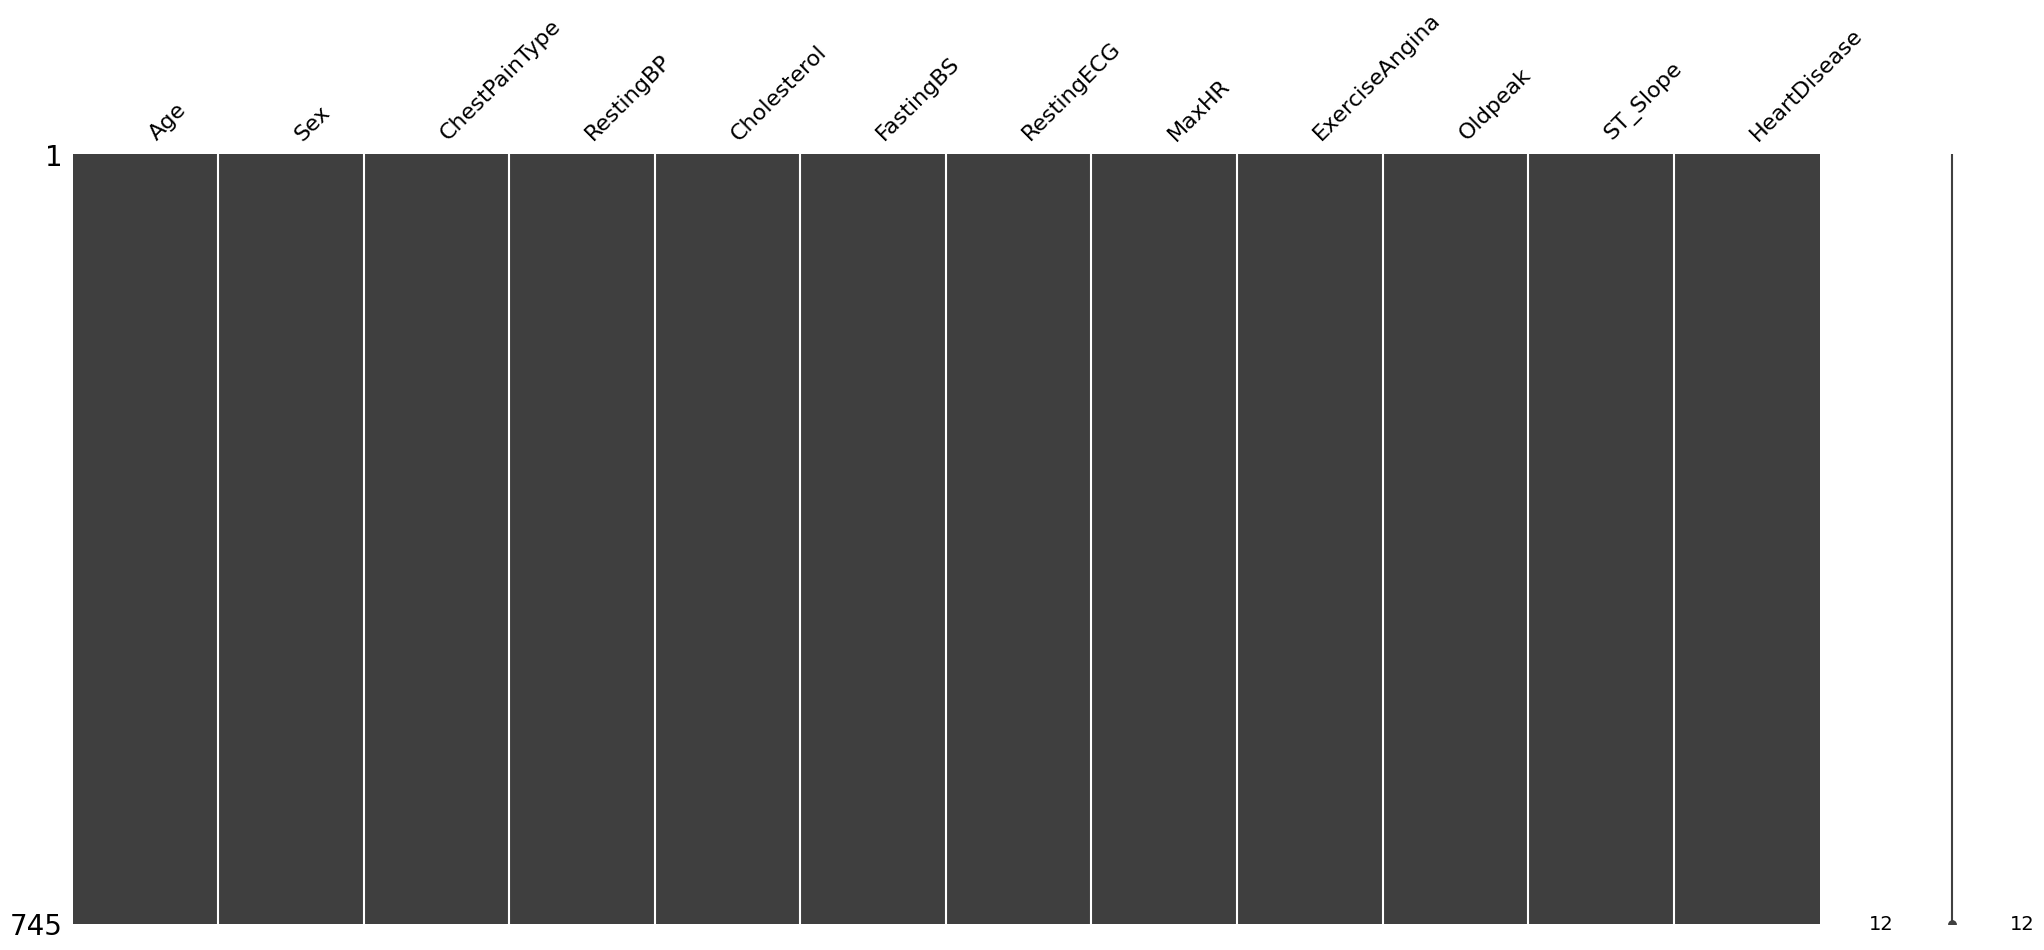

In [19]:
print(df.isnull().sum())
mno.matrix(df.isnull())


#### 7. Duplicate Records Check  


In [25]:
df.duplicated().sum()
df.nunique()

,0
Age,49
Sex,2
ChestPainType,4
RestingBP,63
Cholesterol,220
FastingBS,2
RestingECG,3
MaxHR,109
ExerciseAngina,2
Oldpeak,43


#### 8. Age Distribution Analysis  

- **Frequency of Ages:**  
  The dataset is analyzed to count how many times each age value occurs. This helps in understanding the distribution of age groups within the dataset.  

- **Minimum and Maximum Age:**  
  - **Minimum Age:** Provides the youngest individual in the dataset.  
  - **Maximum Age:** Provides the oldest individual in the dataset.  



In [38]:
print("The number of occurrences of each age is: \n",df["Age"].value_counts())
print("The minimum age is: ",df["Age"].min())
print("The maximum age is: ",df["Age"].max())


The number of occurrences of each age is: 
 Age
54    47
58    36
55    35
57    31
52    30
48    29
56    27
59    26
51    26
62    25
53    23
41    22
46    22
60    22
50    21
43    20
49    20
61    19
63    19
44    19
64    17
45    17
42    16
65    16
39    15
47    15
67    13
37    11
40    11
66    10
38    10
35    10
69     9
68     7
34     6
36     5
74     5
70     5
71     5
32     4
29     3
75     3
72     3
33     2
31     2
77     2
76     2
30     1
28     1
Name: count, dtype: int64
The minimum age is:  28
The maximum age is:  77


#### 9. Age Distribution Visualization  

- A **histogram** is plotted to show the distribution of the `Age` variable.  
- **Bins:** The ages are grouped into 30 bins for better granularity.  
- **Violin Plot (marginal):** Added on top of the histogram to visualize the density and spread of the data.  



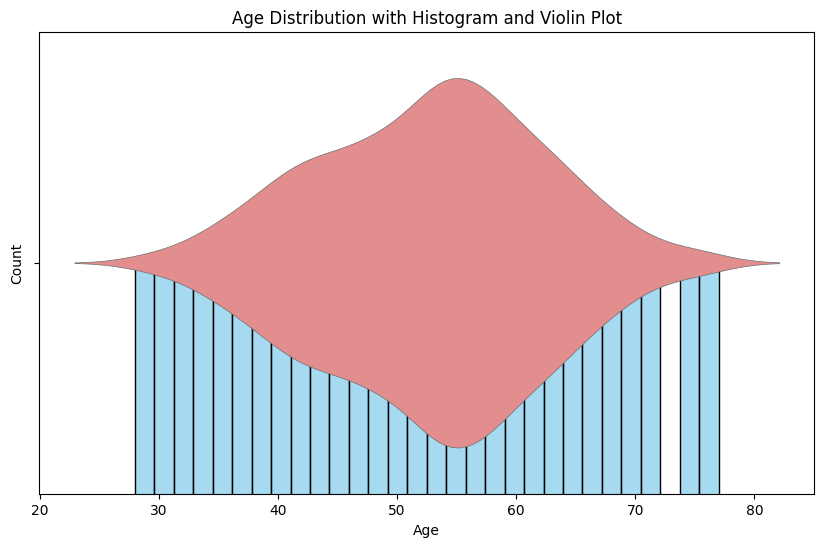

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", bins=30, kde=False, color="skyblue", edgecolor="black")

sns.violinplot(data=df, x="Age", inner=None, color="lightcoral", linewidth=0.5)

plt.title("Age Distribution with Histogram and Violin Plot")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()
px.sunburst(df, path=['Age', 'HeartDisease'], values='RestingBP')

#### 10. Gender Distribution Analysis  

- **Unique Values:**  
  The dataset contains categorical values representing different genders. Checking unique values confirms the categories present (e.g., 0/1 or Male/Female).  

- **Frequency Count:**  
  The occurrences of each gender are counted to understand the distribution.  

**Why this is important:**  
- Ensures that both categories are properly represented in the dataset.  
- Helps identify if the dataset is **imbalanced** in terms of gender representation, which could influence the fairness and accuracy of predictive models.  


In [47]:
print("The number of the unique values: ",df["Sex"].unique())
print("The number of occurence of each sex is: \n",df["Sex"].value_counts())

The number of the unique values:  ['M' 'F']
The number of occurence of each sex is: 
 Sex
M    563
F    182
Name: count, dtype: int64


#### 11. Gender Distribution Visualization  

- A **histogram** is created to display the distribution of the `Sex` variable.  
- This plot shows the count of each gender category present in the dataset.  

**Insights from this plot:**  
- Makes it easier to see whether the dataset is **balanced or imbalanced** in terms of gender.  
- Helps assess whether gender representation might affect model training and prediction outcomes.  


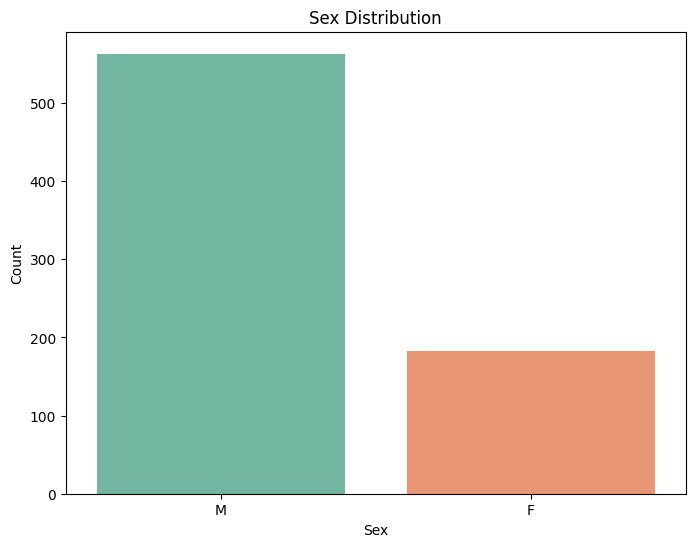

In [27]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(8,6))

# Countplot for categorical variable "Sex"
sns.countplot(data=df, x="Sex", palette="Set2")

plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()

#### 12. Age Distribution by Gender  

- The dataset is grouped by **gender (`Sex`)**, and within each group, the **frequency of different ages** is counted.  
- Sorting the values highlights which **age–gender combinations** are least common and which are most frequent.  



In [28]:
df.groupby("Sex")["Age"].value_counts().sort_values()

Sex  Age
F    69      1
     68      1
     40      1
     38      1
     33      1
            ..
M    52     25
     57     25
     55     28
     58     29
     54     32
Name: count, Length: 90, dtype: int64

#### 13. Age Distribution by Gender (Visualization)  

- A **histogram** is plotted to compare the age distribution across different genders.  
- The `Sex` variable is used as the color grouping, allowing us to visualize how the population is divided by age and gender.  

**Insights from this plot:**  
- Highlights whether certain age groups are **dominated by one gender**.  
- Shows the overall spread of ages within each gender.  
- Useful to detect demographic trends, such as whether middle-aged or older groups are more concentrated in one gender.  


Text(0, 0.5, 'Count')

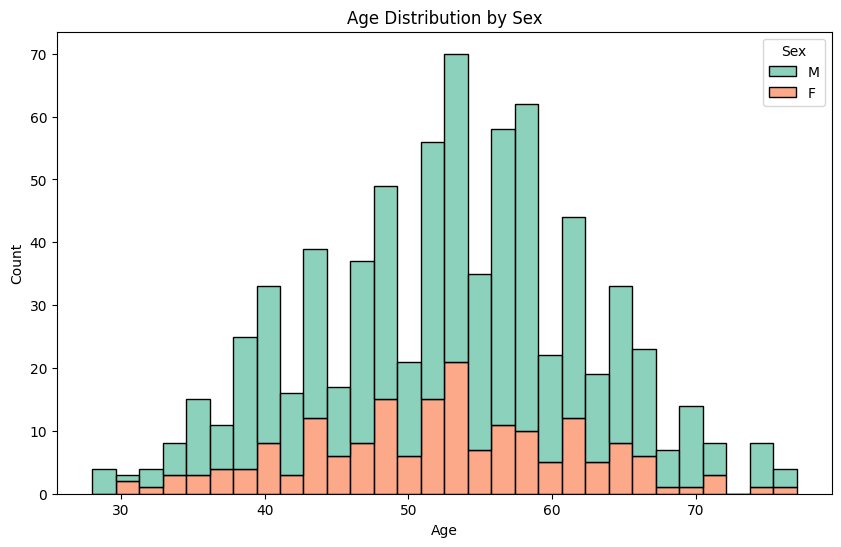

In [29]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x="Age",
    hue="Sex",          # color by Sex
    bins=30,            # same as nbins=30
    kde=False,          # set True if you also want smooth density lines
    palette="Set2",
    multiple="stack"
)

plt.title("Age Distribution by Sex")
plt.xlabel("Age")
plt.ylabel("Count")


#### 14. Chest Pain Type Distribution  

- The dataset is analyzed to count the occurrences of each **Chest Pain Type** (`ChestPainType`).  
- This feature is categorical and typically includes categories such as:  
  - **ATA (Asymptomatic Typical Angina)**  
  - **NAP (Non-Anginal Pain)**  
  - **TA (Typical Angina)**  
  - **ASY (Asymptomatic)**  

**Why this is important:**  
- Provides insight into the **distribution of patients by chest pain category**.  
- Helps identify which types of chest pain are most common in the dataset.  
- Since chest pain is a major indicator of heart disease, understanding its distribution is crucial for building predictive models.  


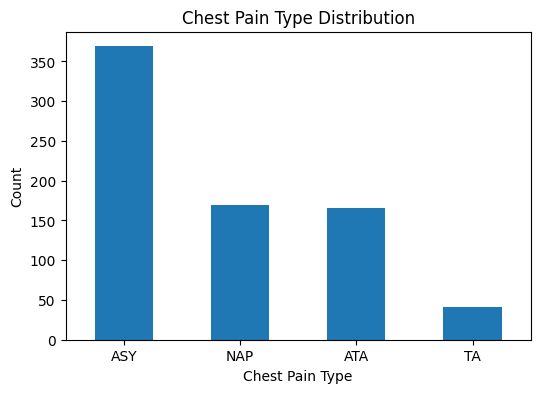

In [91]:

import matplotlib.pyplot as plt

counts = df["ChestPainType"].value_counts()

# Plot
plt.figure(figsize=(6,4))
counts.plot(kind="bar")

plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


#### 15. Chest Pain Type Distribution (Visualization)  

- A **histogram** is plotted to visualize the distribution of different `ChestPainType` categories.  
- Each chest pain type is color-coded, making it easy to distinguish between categories.  

**Insights from this plot:**  
- Clearly shows which chest pain types are most frequent in the dataset.  
- Highlights possible **imbalances in category representation** (e.g., one type being much more common than others).  
- This helps assess whether the dataset provides enough variation across chest pain categories for reliable model training.  


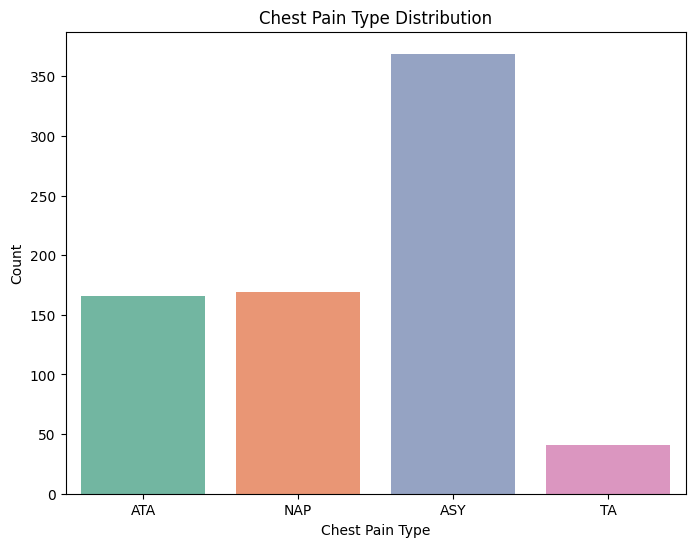

In [46]:
plt.figure(figsize=(8,6))

sns.countplot(
    data=df,
    x="ChestPainType",
    hue="ChestPainType",    # same color coding by category
    palette="Set2"          # you can try "pastel", "husl", "coolwarm"
)

plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend([],[], frameon=False)  # remove duplicate legend (since x=hue same)

plt.show()

#### 16. Chest Pain Type by Gender (Visualization)  

- A **histogram** is created to analyze the distribution of different `ChestPainType` categories across genders (`Sex`).  
- The bars are color-coded by gender, allowing comparison within each chest pain type.  

**Insights from this plot:**  
- Shows whether certain chest pain types are more **prevalent in one gender** compared to the other.  
- Useful for detecting **gender-based patterns** in chest pain symptoms, which may have clinical significance.  
- Helps determine if chest pain type could be an important feature when modeling the relationship between gender and heart disease.  


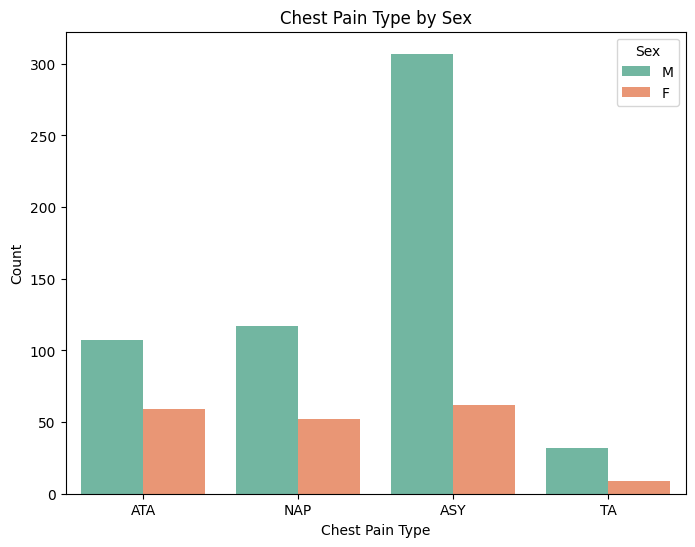

In [52]:
plt.figure(figsize=(8,6))

sns.countplot(
    data=df,
    x="ChestPainType",
    hue="Sex",
    palette="Set2"
)
plt.title("Chest Pain Type by Sex")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

plt.show()

#### 17. Chest Pain Type by Gender and Age  

- The dataset is grouped by **gender (`Sex`)** and **age (`Age`)**, and within each group, the frequency of each `ChestPainType` is calculated.  
- This provides a deeper breakdown of how chest pain symptoms vary across **different demographic segments**.  

**Why this is useful:**  
- Identifies which **age–gender groups** are most associated with particular chest pain types.  
- Helps in understanding whether certain symptoms are more **common in younger vs. older individuals**, and whether this differs between males and females.  
- Provides valuable insights for feature engineering, as chest pain type combined with age and gender could be a strong predictor of heart disease.  


#### Chest Pain Type by Age and Gender (Visualization)  

- A **scatter plot** is created with:  
  - **X-axis:** Age of individuals.  
  - **Y-axis:** Gender (`Sex`).  
  - **Color:** Represents the `ChestPainType` categories.  

**Insights from this plot:**  
- Shows how chest pain types are distributed across different ages within each gender.  
- Helps identify whether certain chest pain categories are more common at **specific age ranges** and whether this varies by gender.  
- Useful for detecting patterns such as whether older males/females are more likely to experience a specific chest pain type.  


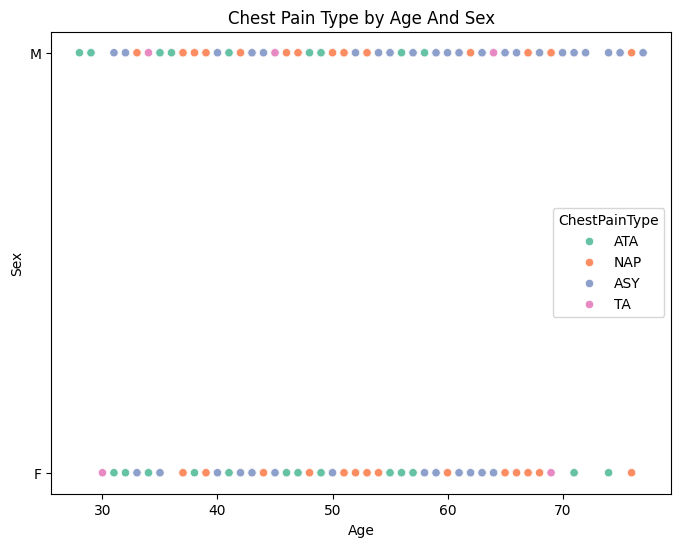

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Sex", hue="ChestPainType", palette="Set2")
plt.title("Chest Pain Type by Age And Sex")
plt.show()

#### 19. Resting Blood Pressure (RestingBP) Analysis  

- **Frequency Count:**  
  The occurrences of each **Resting Blood Pressure (RestingBP)** value are counted and sorted.  
  - This helps in understanding the distribution of blood pressure readings across the dataset.  

- **Visualization:**  
  A **histogram with KDE (Kernel Density Estimate)** is plotted to show the spread and density of resting blood pressure values.  
  - Histogram bars indicate the frequency of each BP range.  
  - The KDE curve provides a smoothed view of the distribution, highlighting peaks and trends.  

**Insights from this plot:**  
- Helps identify **common BP ranges** in the dataset.  
- Detects **outliers** or unusual BP readings.  
- Useful for understanding whether BP might be a significant predictor for heart disease in further modeling.  


The occurrence of each level of BP:
 RestingBP
92      1
94      2
96      1
98      1
100    11
       ..
178     2
180    10
190     2
192     1
200     2
Name: count, Length: 63, dtype: int64


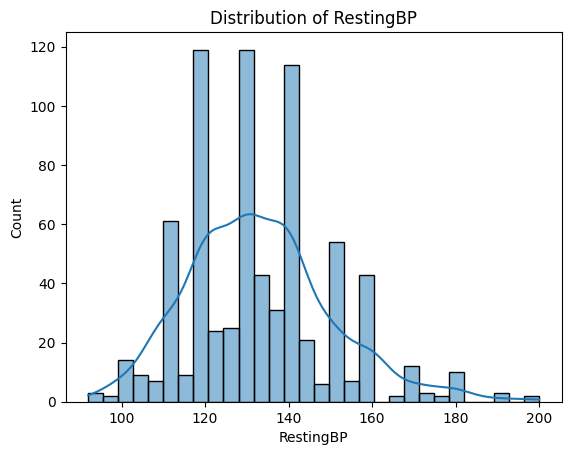

In [58]:
print("The occurrence of each level of BP:\n", df["RestingBP"].value_counts().sort_index())
sns.histplot(data=df, x="RestingBP", kde=True, bins=30)
plt.title("Distribution of RestingBP")
plt.show()
px.sunburst(df, path=['HeartDisease', 'RestingBP'])


#### 20. Resting Blood Pressure by Age and Gender (Visualization)  

- The dataset is grouped by **gender (`Sex`)** and **age (`Age`)**, and the frequency of each `RestingBP` value is analyzed.  
- A **histogram** is plotted with `RestingBP` on the X-axis and bars color-coded by gender.  

  


Text(0.5, 1.0, 'Resting Blood Pressure by Sex')

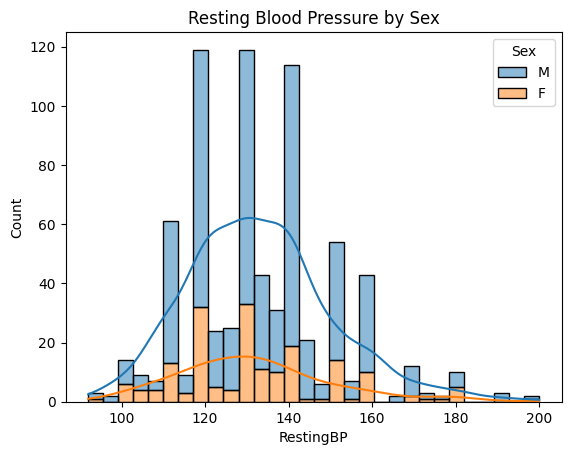

In [59]:
df.groupby(["Sex","Age"])["RestingBP"].value_counts().sort_index()

sns.histplot(
    data=df,
    x="RestingBP",
    hue="Sex",
    kde=True,
    bins=30,
    multiple="stack"
).set_title("Resting Blood Pressure by Sex")



#### 21. Cholesterol Level Analysis  

- **Frequency Count:**  
  The occurrences of each **Cholesterol** value are counted and sorted.  
  - This provides insight into the distribution of cholesterol levels in the dataset.  

- **Visualization:**  
  A **histogram** is plotted to display the distribution of cholesterol levels.  
  - Helps identify common ranges and unusual values.  
  - Useful for detecting outliers and understanding the overall spread of the data.  




Text(0.5, 1.0, 'Cholesterol Level Distribution')

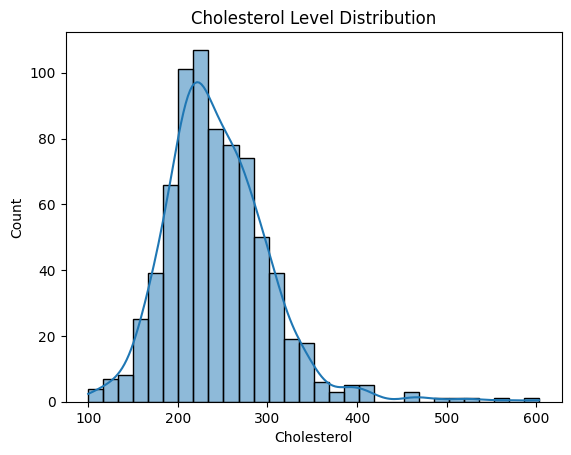

In [60]:
df["Cholesterol"].value_counts().sort_index()

sns.histplot(
    data=df,
    x="Cholesterol",
    bins=30,
    kde=True
).set_title("Cholesterol Level Distribution")



#### 22. Cholesterol Levels by Age and Gender (Visualization)  

- The dataset is grouped by **gender (`Sex`)** and **age (`Age`)**, and the frequency of each `Cholesterol` value is analyzed.  
- A **scatter plot** is created with:  
  - **X-axis:** Cholesterol levels  
  - **Y-axis:** Age  
  - **Color:** Gender (`Sex`)  

**Insights from this plot:**  
- Shows how cholesterol levels are distributed across different ages for males and females.  
- Helps identify age–gender patterns in cholesterol, such as whether older individuals tend to have higher cholesterol.  
- Useful for detecting trends or clusters that may be predictive of heart disease.  


<Axes: xlabel='Cholesterol', ylabel='Age'>

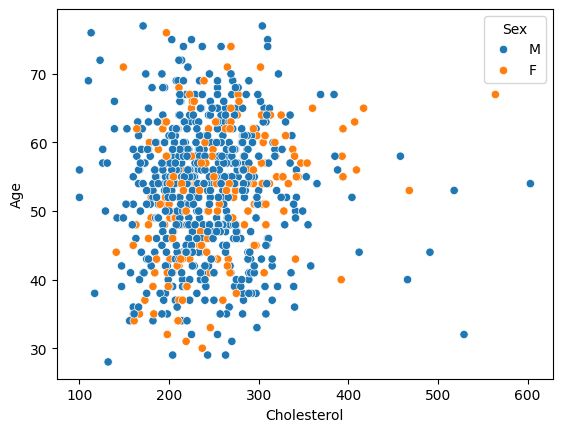

In [61]:
df.groupby(["Sex","Age"])["Cholesterol"].value_counts()

sns.scatterplot(
    data=df,
    x="Cholesterol",
    y="Age",
    hue="Sex"
)


#### 23. Relationship Between Resting Blood Pressure and Cholesterol  

- A **bar plot** is created to examine the relationship between **Resting Blood Pressure (`RestingBP`)** and **Cholesterol levels (`Cholesterol`)**.  
- **X-axis:** RestingBP values  
- **Y-axis:** Cholesterol values  

**Insights from this plot:**  
- Helps visualize whether higher blood pressure values are associated with higher cholesterol levels.  
- Useful for detecting potential correlations between these two important cardiovascular indicators.  
- Can guide feature selection and understanding of risk factors before modeling heart disease.  


<Axes: xlabel='RestingBP', ylabel='Cholesterol'>

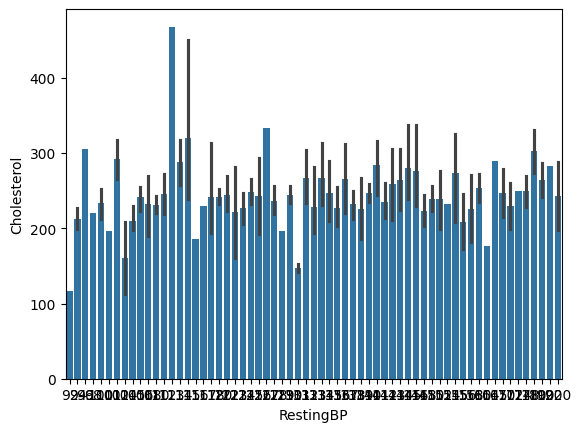

In [77]:
sns.barplot(
    data=df,
    x="RestingBP",
    y="Cholesterol"
)



#### 24. Correlation Analysis of Numerical Features  

- A **heatmap** is created to visualize the correlation between key numerical features:  
  - `Age`  
  - `RestingBP`  
  - `Cholesterol`  

- **Annotations:** Correlation values are displayed within each cell for precise interpretation.  

**Insights from this plot:**  
- Shows the strength and direction of linear relationships between features:  
  - Positive correlation → Both variables increase together.  
  - Negative correlation → One variable increases while the other decreases.  
  - Near-zero correlation → Little or no linear relationship.  
- Helps identify features that may be highly related, which is useful for feature selection, multicollinearity checks, and predictive modeling.  


<Axes: >

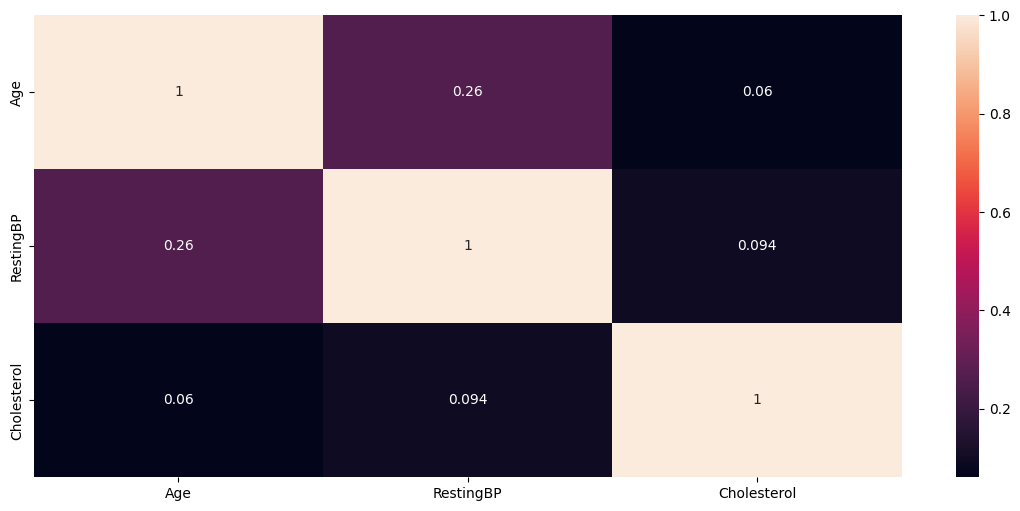

In [62]:
plt.figure(figsize=(14,6))
sns.heatmap(df[["Age","RestingBP","Cholesterol"]].corr(), annot = True)

#### 26. Fasting Blood Sugar by Gender  

- The dataset is grouped by **gender (`Sex`)**, and the occurrences of each **Fasting Blood Sugar (`FastingBS`)** level are counted.  
- This analysis helps understand how blood sugar levels are distributed across males and females.  

**Insights from this analysis:**  
- Identifies whether elevated fasting blood sugar is more prevalent in one gender.  
- Useful for detecting **gender-specific patterns** that could impact heart disease risk.  
- Provides guidance for feature importance and potential preprocessing steps for modeling.  


In [65]:
df.groupby("Sex")["FastingBS"].value_counts()
px.histogram(df, x="FastingBS", color="HeartDisease")

#### 27. Maximum Heart Rate (Thalach) Analysis  

- **Descriptive Statistics:**  
  Summary statistics of the `MaxHR` (maximum heart rate achieved) feature are examined.  
  - Includes metrics like **count, mean, standard deviation, minimum, maximum, and percentiles**.  

**Why this is important:**  
- Helps understand the **range and central tendency** of maximum heart rate values in the dataset.  
- Detects potential **outliers** or unusual values that may need handling.  
- Provides insights into the **overall cardiovascular fitness** of individuals, which is an important predictor for heart disease modeling.  


In [66]:
print(df['MaxHR'].describe())


count    745.000000
mean     140.226846
std       24.540581
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64


#### 28. Maximum Heart Rate (Thalach) Distribution by Gender  

- A **histogram** is plotted to visualize the distribution of `MaxHR` (maximum heart rate) values.  
- The bars are color-coded by **gender (`Sex`)**, allowing comparison between males and females.  

**Insights from this plot:**  
- Highlights the spread and common ranges of maximum heart rate achieved.  
- Helps identify differences in heart rate distribution between genders.  
- Useful for understanding cardiovascular performance patterns and their potential impact on heart disease risk.  


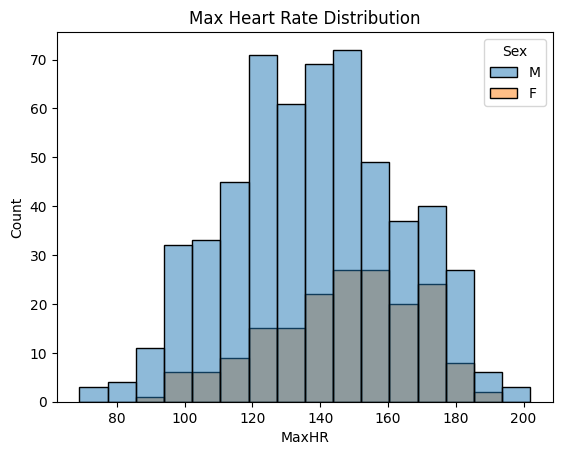

In [67]:
sns.histplot(
    data=df,
    x="MaxHR",
    hue="Sex",
    kde=False
)
plt.title("Max Heart Rate Distribution")
plt.show()


#### 29. ST_Slope VS HeartDisease
  


In [73]:
px.histogram(df, x="ST_Slope", color="HeartDisease")

#### 30. Exercise-Induced Angina (ExerciseAngina) Distribution  

- The occurrences of each category in the **Exercise Angina (`ExerciseAngina`)** feature are counted.  
- This categorical variable typically indicates whether a patient experiences angina during physical exertion.  

**Insights from this analysis:**  
- Helps understand how many individuals experience exercise-induced angina versus those who do not.  
- Important for assessing **risk factors** for heart disease.  
- Provides guidance for feature selection and potential preprocessing for predictive modeling.  


In [75]:
px.histogram(df, x="ExerciseAngina", color="HeartDisease")

#### 31. Exercise-Induced Angina Distribution by Gender  

- A **histogram** is plotted to visualize the distribution of the `ExerciseAngina` feature.  
- The bars are color-coded by **gender (`Sex`)** to compare prevalence between males and females.  

**Insights from this plot:**  
- Shows how many individuals experience exercise-induced angina versus those who do not.  
- Highlights potential gender differences in angina occurrence.  
- Useful for understanding a key **risk factor for heart disease** and its demographic patterns.  
|

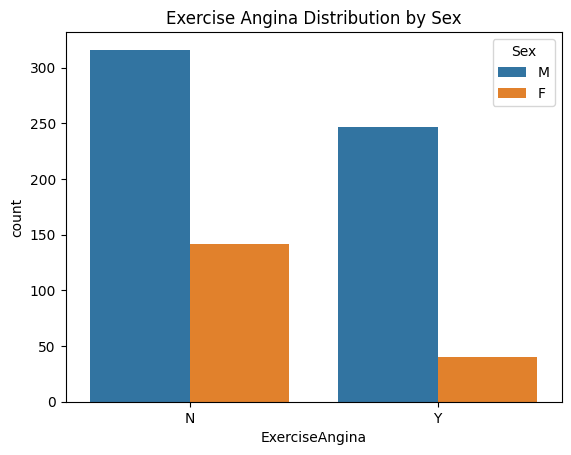

In [78]:
sns.countplot(data=df, x="ExerciseAngina", hue="Sex")
plt.title("Exercise Angina Distribution by Sex")
plt.show()


#### 32. Age Distribution by Exercise-Induced Angina  

- A **histogram** is plotted to visualize the distribution of **Age** based on **Exercise Angina (`ExerciseAngina`)** categories.  
- Bars are color-coded by `ExerciseAngina`, allowing comparison of age groups who experience angina versus those who do not.  

**Insights from this plot:**  
- Helps identify which age groups are more likely to experience exercise-induced angina.  
- Provides insights into the **age-related risk patterns** for heart disease.  
- Useful for feature analysis and understanding demographic influences on heart disease prevalence.  


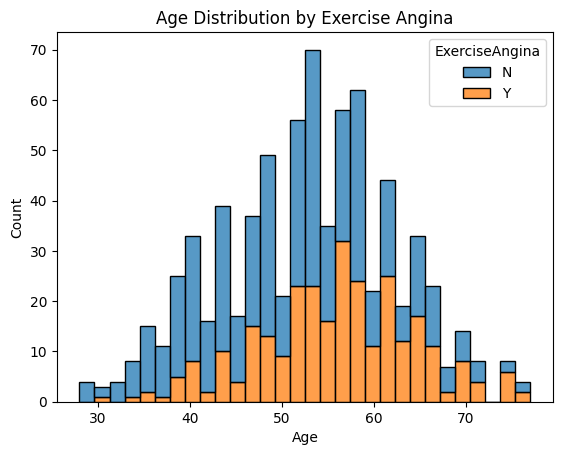

In [79]:
sns.histplot(data=df, x="Age", hue="ExerciseAngina", multiple="stack", bins=30)
plt.title("Age Distribution by Exercise Angina")
plt.show()


#### 33. Age Distribution by Heart Disease  

- A **histogram** is plotted to visualize the distribution of **Age** based on the **Heart Disease (`HeartDisease`)** target variable.  
- Bars are color-coded by `HeartDisease` to show the proportion of individuals with and without heart disease across different age groups.  

**Insights from this plot:**  
- Highlights which age groups are more affected by heart disease.  
- Helps detect patterns such as higher prevalence in older individuals.  
- Useful for feature analysis and understanding demographic risk factors for heart disease prediction.  


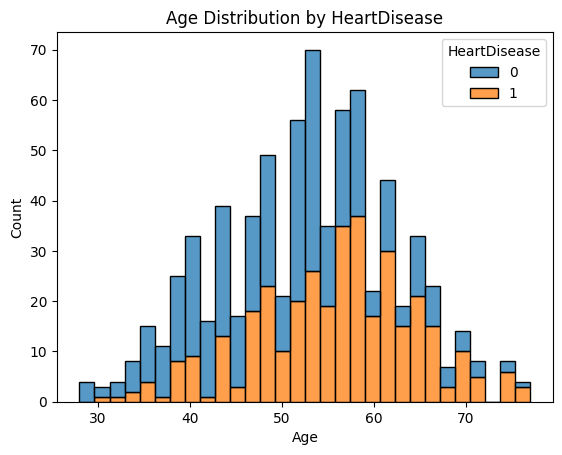

In [80]:
sns.histplot(data=df, x="Age", hue="HeartDisease", multiple="stack", bins=30)
plt.title("Age Distribution by HeartDisease")
plt.show()


#### 34. Pairwise Feature Relationships  

- A **pairplot** is generated to visualize **pairwise relationships** between all numerical features in the dataset.  
- **Purpose:**  
  - Explore correlations, trends, and interactions between features.  
  - Identify potential patterns that may help in predicting the target variable (`HeartDisease`).  
  - Detect outliers or unusual distributions.  

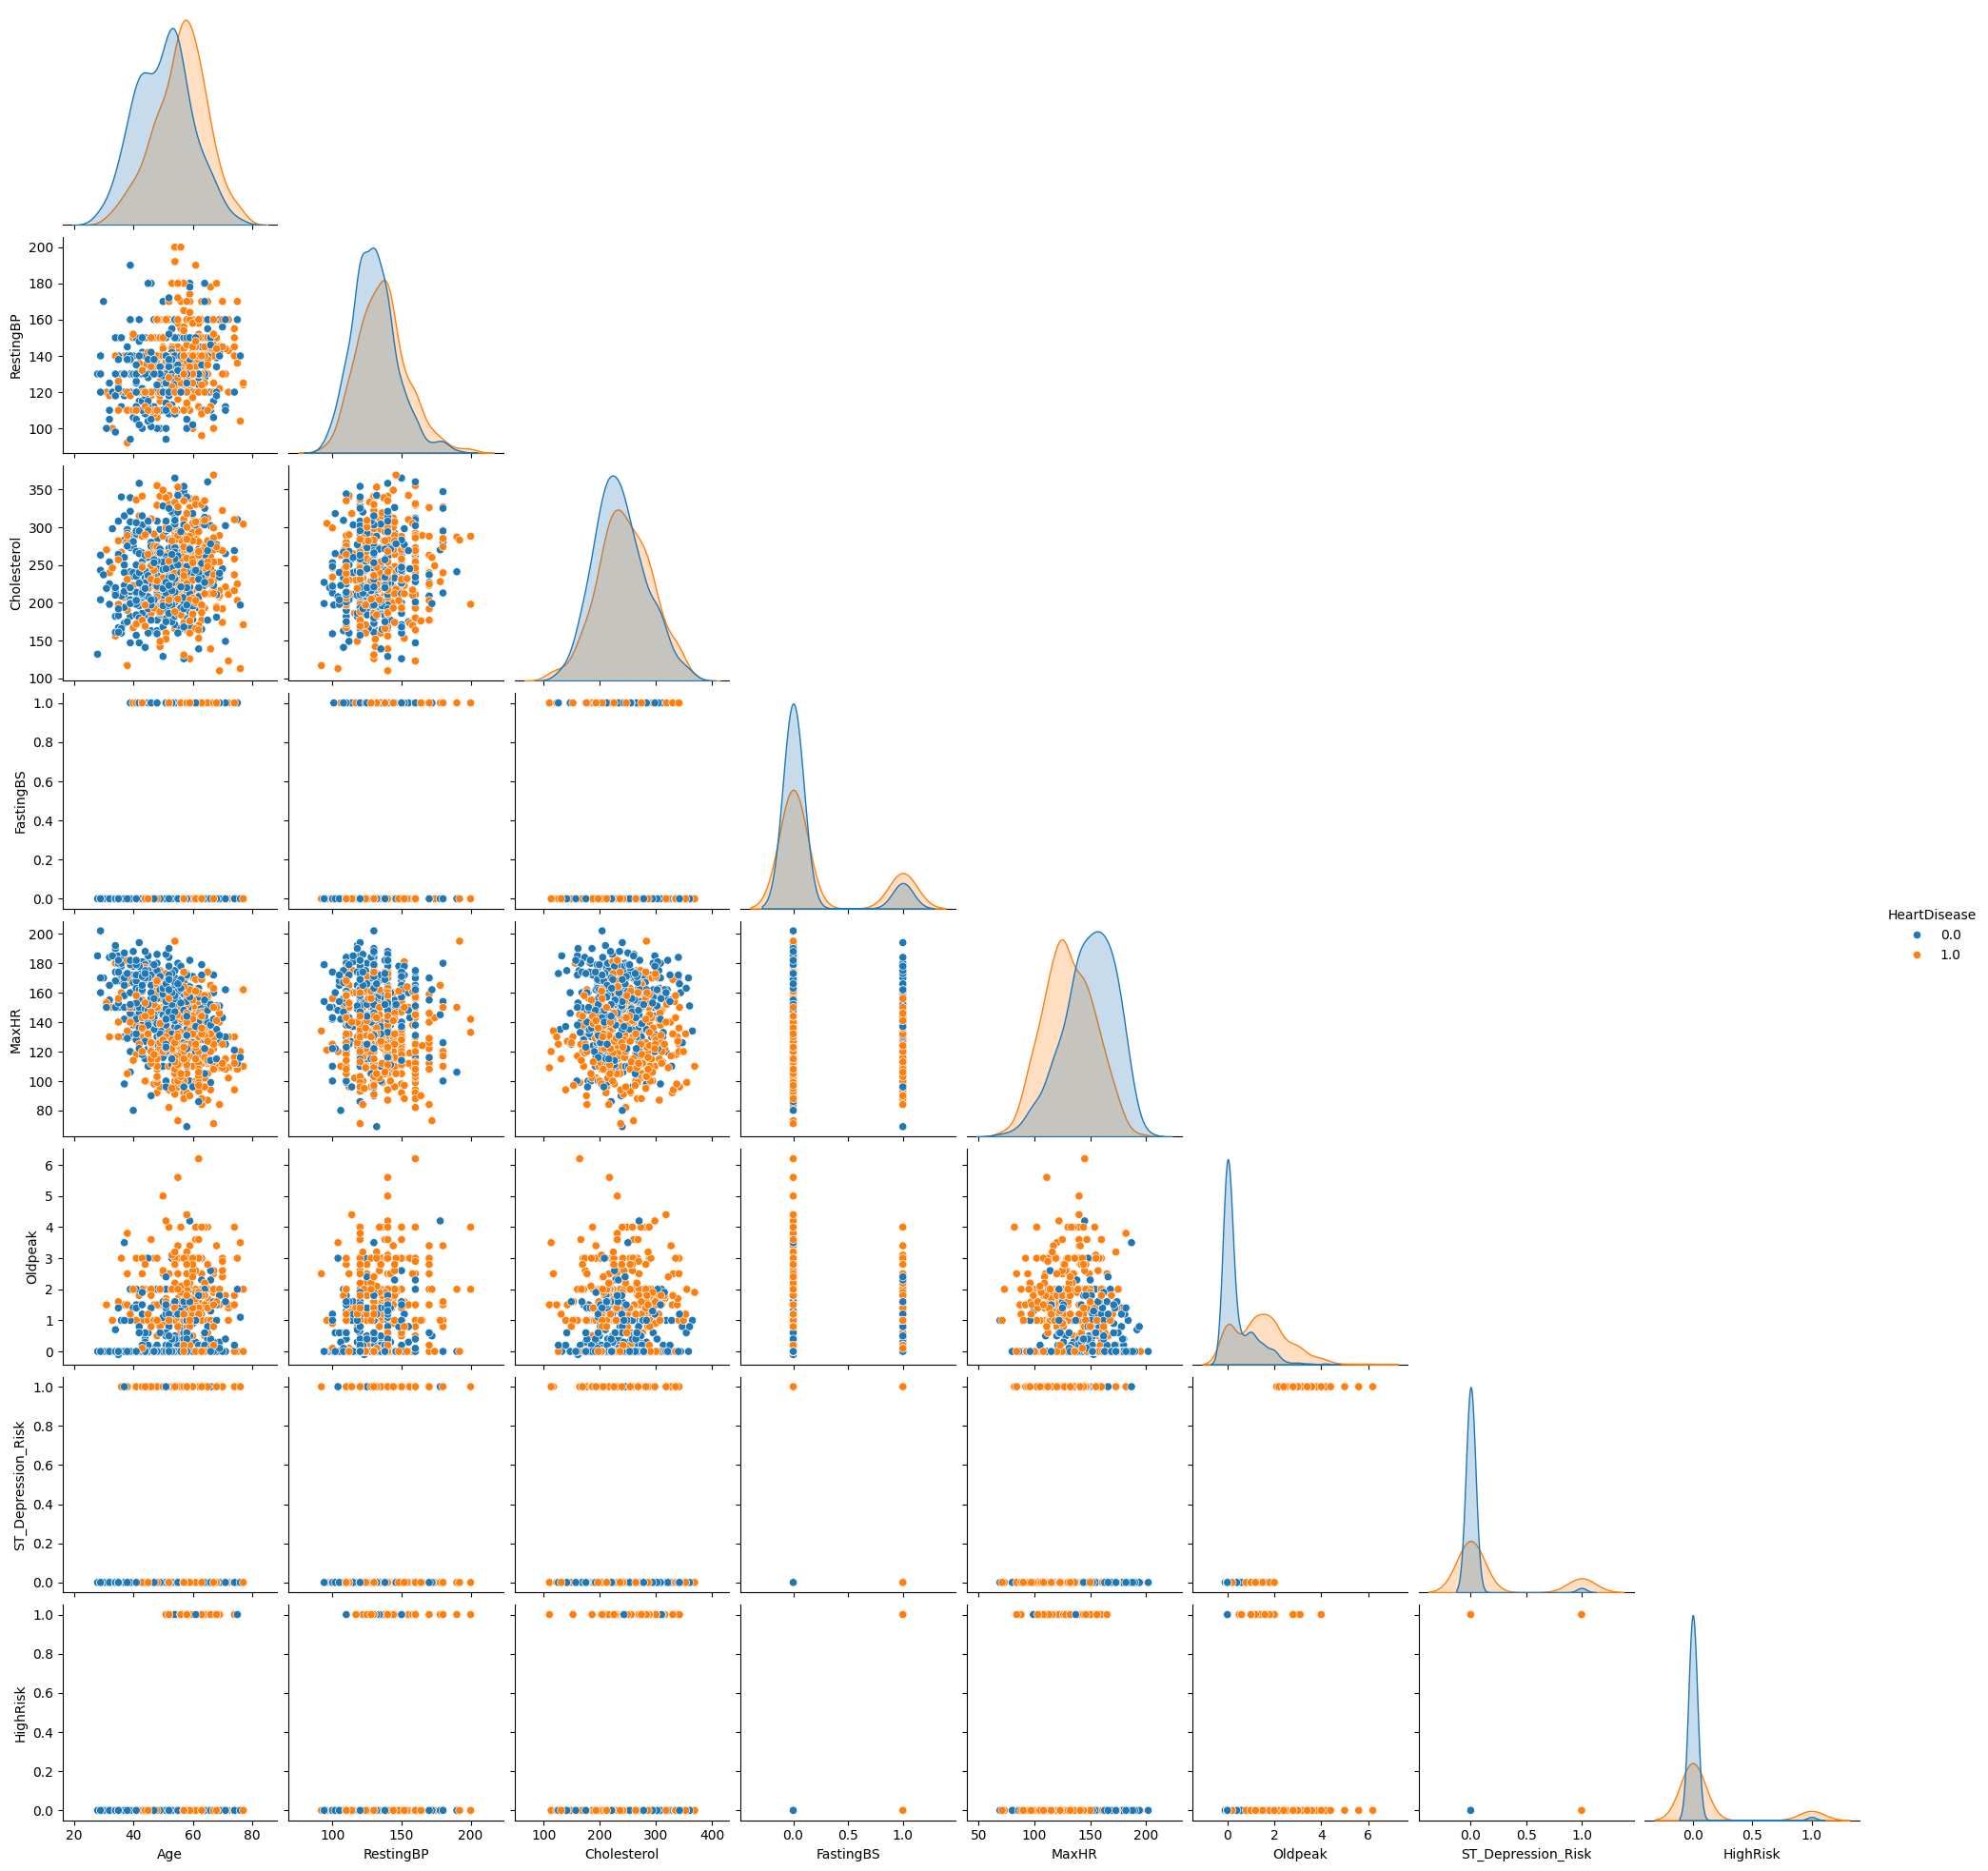

In [90]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df,corner=True,hue="HeartDisease" )

#### 35. Correlation Heatmap of Numeric Features  

- A **correlation heatmap** is created to examine relationships between all **numerical features** in the dataset.  
- **Visualization:**  
  - Colors represent the strength and direction of correlations (positive or negative).  
  - Numerical values are displayed on each cell for precise interpretation.  
  - Uses the `RdBu_r` color scale for clear distinction between positive and negative correlations.  



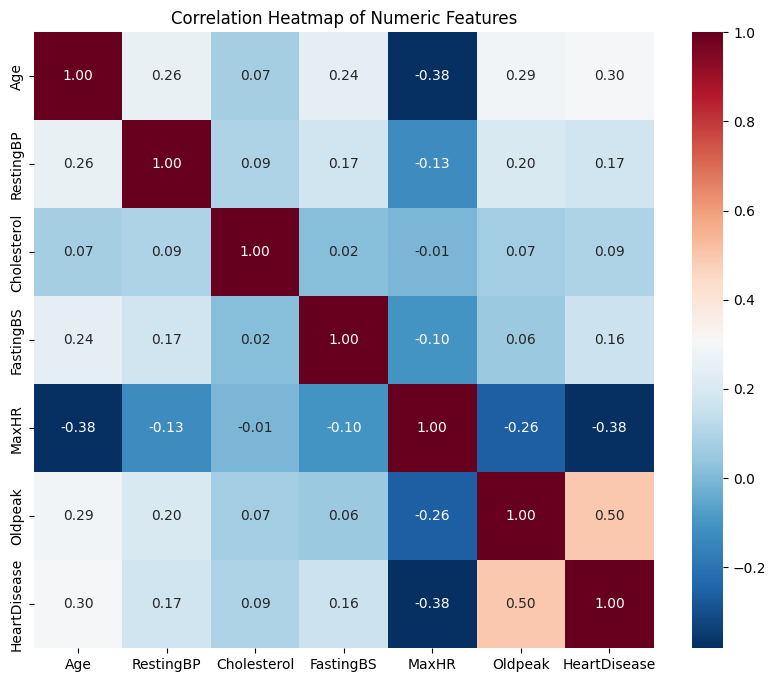

In [92]:
corr = df[num_data].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


#### 36. Boxplot Analysis of Numerical Features  

- A **boxplot** is created for key numerical features:  
  - `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `Oldpeak`, and the target `HeartDisease`.  
- **Purpose:**  
  - Visualize the **distribution**, **central tendency**, and **spread** of each feature.  
  - Identify **outliers** that may affect model performance.  
  - Compare distributions across different features to detect skewness or unusual patterns.  
  


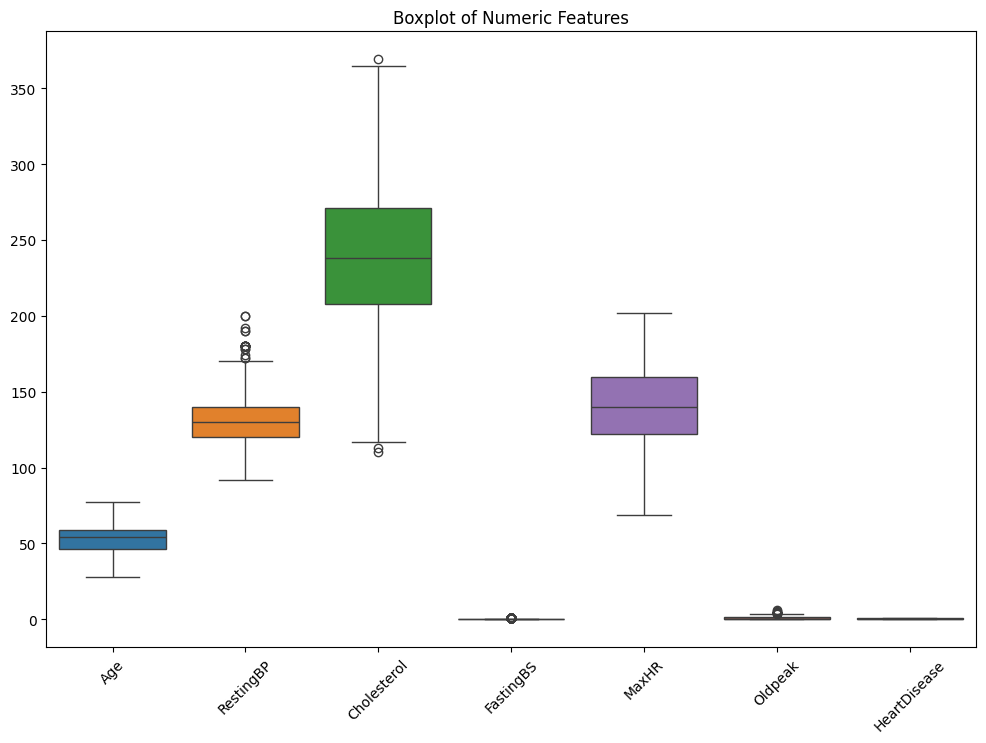

In [93]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_data])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()


#### 38. Outlier Analysis for Resting Blood Pressure  

- A **histogram with marginal boxplot** is created for `RestingBP` to analyze the distribution and detect outliers simultaneously.  
- **Histogram:** Shows the frequency of different resting blood pressure values.  
- **Boxplot (marginal):** Highlights **outliers** and the spread of the data.  

**Insights from this plot:**  
- Helps identify unusually high or low blood pressure readings.  
- Provides guidance for **outlier handling** during preprocessing.  
- Useful for understanding the distribution of a critical cardiovascular risk factor before modeling.  


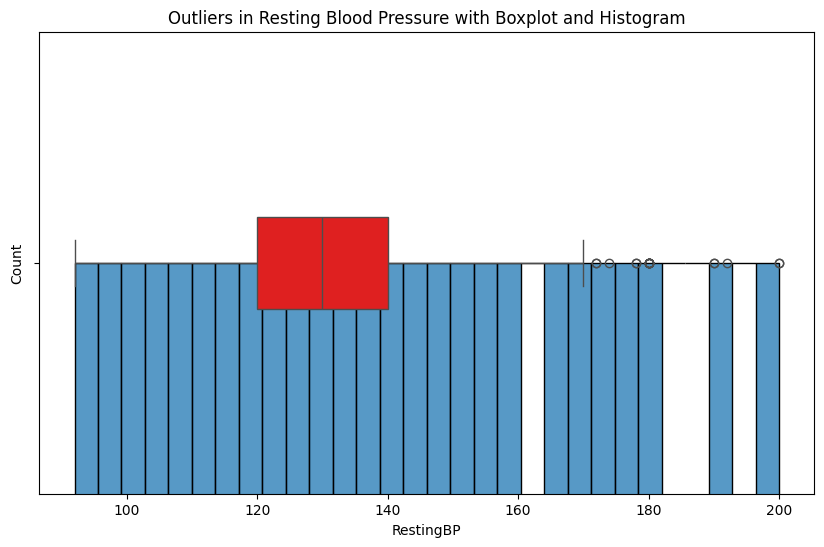

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(df["RestingBP"], bins=30, kde=False)
sns.boxplot(x=df["RestingBP"], orient="h", color="red", width=0.2)
plt.title("Outliers in Resting Blood Pressure with Boxplot and Histogram")
plt.show()


#### 39. Outlier Analysis for Cholesterol  

- A **histogram with marginal boxplot** is created for `Cholesterol` to analyze the distribution and detect outliers simultaneously.  
- **Histogram:** Shows the frequency of different cholesterol values.  
- **Boxplot (marginal):** Highlights **outliers** and the spread of the data.  

**Insights from this plot:**  
- Helps identify unusually high or low cholesterol readings.  
- Provides guidance for **outlier handling** during preprocessing.  
- Useful for understanding the distribution of an important cardiovascular risk factor before modeling.  


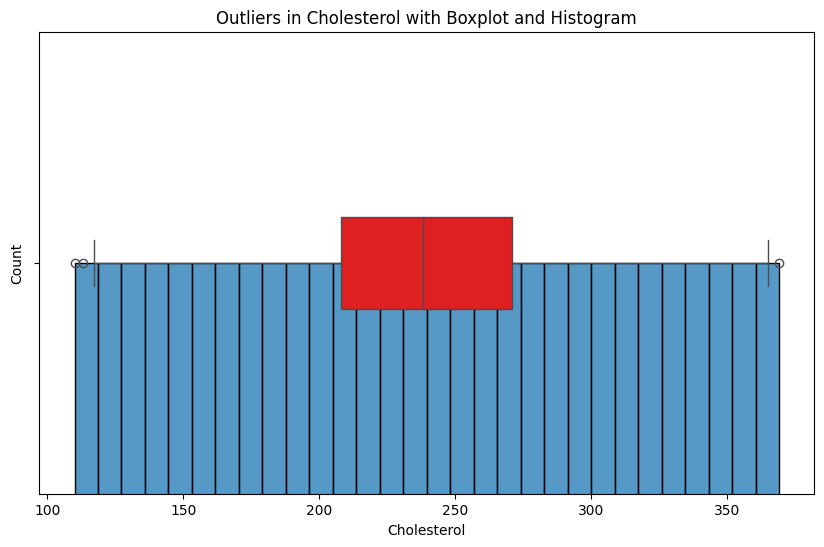

In [95]:
plt.figure(figsize=(10,6))
sns.histplot(df["Cholesterol"], bins=30, kde=False)
sns.boxplot(x=df["Cholesterol"], orient="h", color="red", width=0.2)
plt.title("Outliers in Cholesterol with Boxplot and Histogram")
plt.show()


#### 40. Outlier Analysis for Maximum Heart Rate (MaxHR)  

- A **histogram with marginal boxplot** is created for `MaxHR` to analyze the distribution and detect outliers simultaneously.  
- **Histogram:** Shows the frequency of different maximum heart rate values.  
- **Boxplot (marginal):** Highlights **outliers** and the spread of the data.  

**Insights from this plot:**  
- Helps identify unusually high or low maximum heart rate readings.  
- Provides guidance for **outlier handling** during preprocessing.  
- Useful for understanding the distribution of a critical cardiovascular metric before predictive modeling.  


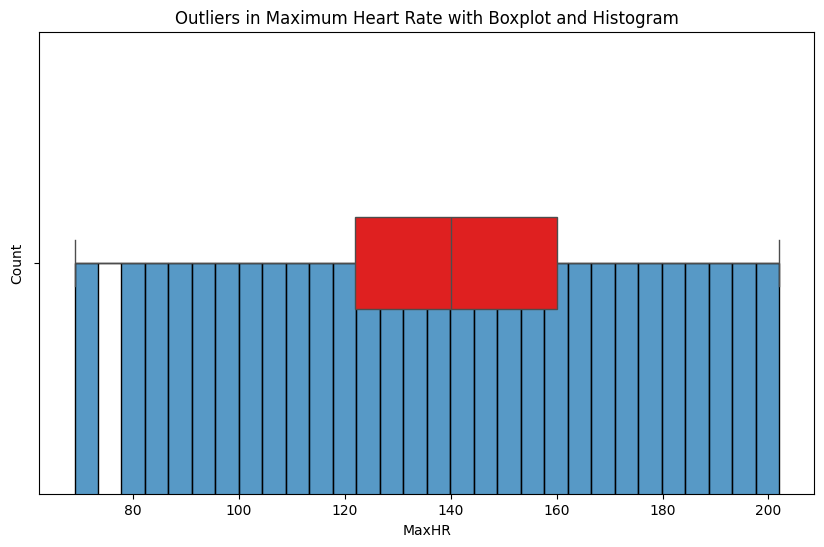

In [96]:
plt.figure(figsize=(10,6))
sns.histplot(df["MaxHR"], bins=30, kde=False)
sns.boxplot(x=df["MaxHR"], orient="h", color="red", width=0.2)
plt.title("Outliers in Maximum Heart Rate with Boxplot and Histogram")
plt.show()


#### 41. Outlier Handling and Missing Value Imputation  

- **Objective:** Detect and handle outliers in key numerical features to improve data quality for modeling.  

- **Steps:**  
  1. **Replace Zero Values:**  
     - `RestingBP` values of 0 are replaced with `NaN` since zero is not a valid blood pressure reading.  
  2. **Outlier Detection (IQR Method):**  
     - For each specified column (`MaxHR`, `Cholesterol`):  
       - Calculate the **first (Q1) and third (Q3) quartiles**.  
       - Compute the **interquartile range (IQR = Q3 - Q1)**.  
       - Define **lower and upper bounds**:  
         - Lower Bound = Q1 - 1.5 * IQR  
         - Upper Bound = Q3 + 1.5 * IQR  
       - Values outside these bounds are considered **outliers** and replaced with `NaN`.  

**Insights and Importance:**  
- Handles extreme values that could skew model training.  
- Ensures that machine learning algorithms are not biased by anomalous data points.  
- Prepares the dataset for **imputation or further preprocessing** of missing values.  


In [106]:
import numpy as np

def check_outliers(df, cols):
    for col in cols:   # loop through each column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Only replace TRUE outliers with NaN
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        df.loc[outliers, col] = np.nan

    return df


df["RestingBP"] = df["RestingBP"].replace(0,np.nan)
df = check_outliers(df, cols=["MaxHR", "Cholesterol"])


In [107]:
df['AgeGroup'] = pd.cut(df['Age'],bins=[0, 35, 50, 120],labels=['Young', 'Middle-aged', 'Senior'])
df['CholCategory'] = pd.cut(df['Cholesterol'],bins=[0, 200, 239, np.inf],labels=['Desirable', 'Borderline', 'High'])
df['ST_Depression_Risk'] = np.where(df['Oldpeak'] > 2, 1, 0)
df['HighRisk'] = np.where((df['FastingBS'] == 1) & (df['ExerciseAngina'] == 'Y') & (df['Age'] > 50),1, 0)



#### 42. Preprocessing Pipelines and Train-Test Split  

- **Objective:** Prepare numerical and categorical features for modeling, and split the dataset into training and testing sets.  

- **Preprocessing Pipelines:**  
  1. **Numerical Pipeline (`num_trans`):**  
     - **Imputer:** Replace missing numerical values with the mean.  
     - **Scaler:** Standardize features using `StandardScaler` for uniform scale.  
  2. **Categorical Pipeline (`cat_trans`):**  
     - **Imputer:** Replace missing categorical values with the most frequent value.  
     - **Encoder:** Convert categorical variables into numerical format using `OneHotEncoder` (ignoring unknown categories).  
  3. **Column Transformer (`preprocessors`):**  
     - Combines numerical and categorical pipelines to apply appropriate transformations to respective feature types.  

- **Train-Test Split:**  
  - Split features (`X`) and target (`y`) into training and testing sets:  
    - `x_train`, `y_train` → 80% of the data for training.  
    - `x_test`, `y_test` → 20% of the data for testing.  
  - `random_state=42` ensures reproducibility.  

**Insights:**  
- Ensures that numerical and categorical features are correctly preprocessed for machine learning.  
- Prepares data for **model training, evaluation, and oversampling with SMOTE**.  
- Training and testing sets maintain a representative sample of the dataset for unbiased evaluation.  


In [108]:
num_trans =Pipeline(
    steps = [
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)
cat_trans = Pipeline(
    steps = [
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessors = ColumnTransformer(
    transformers=[
        ("num",num_trans,num_col),
        ("cat",cat_trans,cat_col)
    ]
)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


print("The features in x train: ",x_train.shape)
print("The features in x_tese: ",x_test.shape)



The features in x train:  (596, 15)
The features in x_tese:  (149, 15)


#### 43. Model Training, Evaluation, and Comparison  

- **Objective:** Train multiple machine learning models to predict heart disease and compare their performance.  

- **Models Used:**  
  - Logistic Regression  
  - Random Forest  
  - Gradient Boosting  
  - XGBoost  
  - Support Vector Machine (SVM)  
  - K-Nearest Neighbors (KNN)  

- **Pipeline:**  
  1. Preprocess numerical and categorical features using the `preprocessors` pipeline.  
  2. Handle class imbalance with **SMOTE** within the training set.  
  3. Train the classifier using the resampled data.  

- **Evaluation Metrics:**  
  - **Cross-validation mean accuracy (`cv_mean`)**  
  - **Accuracy** on the test set  
  - **Precision**: Measures proportion of true positives among predicted positives  
  - **Recall**: Measures proportion of true positives detected among actual positives  
  - **F1 Score**: Harmonic mean of precision and recall  

- **Outcome:**  
  - A comparison table (`result_df`) is generated showing the performance of each model across all metrics.  
  - Helps select the **best-performing model** for heart disease prediction based on balanced performance.  

**Insights:**  
- Evaluates multiple models systematically using cross-validation and test metrics.  
- Incorporates preprocessing, oversampling, and classification in a unified pipeline for reproducibility.  
- Provides a clear overview of which model performs best for this dataset.  


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessors),
        ('classifier', model)
    ])


    cv_scores = cross_val_score(pipeline, x_train, y_train,
                               cv=5, scoring='accuracy', n_jobs=-1)


    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_proba = pipeline.predict_proba(x_test)
        if len(set(y_train)) == 2:  # Binary
            y_proba = y_proba[:, 1]
    elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
        y_proba = pipeline.decision_function(x_test)
    else:
        y_proba = None

    avg = 'binary' if len(set(y_train)) == 2 else 'weighted'
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=avg)
    recall = recall_score(y_test, y_pred, average=avg)
    f1 = f1_score(y_test, y_pred, average=avg)

    if y_proba is not None:
        if len(set(y_train)) == 2:
            roc_auc = roc_auc_score(y_test, y_proba)
        else:
            roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    else:
        roc_auc = None

    results[name] = {
        'cv_mean': cv_scores.mean(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }


result_df = pd.DataFrame(results).T
print(result_df)


                      cv_mean  accuracy  precision    recall        f1  \
Logistic Regression  0.855672  0.859060   0.890411  0.833333  0.860927   
Random Forest        0.852339  0.872483   0.893333  0.858974  0.875817   
Gradient Boosting    0.852339  0.838926   0.875000  0.807692  0.840000   
XGBoost              0.857353  0.865772   0.902778  0.833333  0.866667   
SVM                  0.852339  0.892617   0.907895  0.884615  0.896104   
KNN                  0.842213  0.798658   0.852941  0.743590  0.794521   

                      roc_auc  
Logistic Regression  0.940231  
Random Forest        0.942940  
Gradient Boosting    0.942759  
XGBoost              0.936800  
SVM                  0.927230  
KNN                  0.879198  


# 44.Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

dt_model = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessors),
    ('classifier', dt_model)
])

cv_scores = cross_val_score(
    pipeline, x_train, y_train,
    cv=5, scoring='accuracy', n_jobs=-1
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

y_proba = pipeline.predict_proba(x_test)[:, 1] if len(set(y_train)) == 2 else None

avg = 'binary' if len(set(y_train)) == 2 else 'weighted'

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=avg)
recall = recall_score(y_test, y_pred, average=avg)
f1 = f1_score(y_test, y_pred, average=avg)

roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "Not applicable (multi-class)"

dt_results = {
    'cv_mean': cv_scores.mean(),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}

print(pd.DataFrame([dt_results], index=["Decision Tree"]))


               cv_mean  accuracy  precision   recall       f1   roc_auc
Decision Tree  0.81042  0.751678   0.773333  0.74359  0.75817  0.752077


# 45.Random Forest

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

rf_model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessors),
    ('classifier', rf_model)
])

cv_scores = cross_val_score(
    pipeline, x_train, y_train,
    cv=5, scoring='accuracy', n_jobs=-1
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

y_proba = pipeline.predict_proba(x_test)[:, 1] if len(set(y_train)) == 2 else None

avg = 'binary' if len(set(y_train)) == 2 else 'weighted'

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=avg)
recall = recall_score(y_test, y_pred, average=avg)
f1 = f1_score(y_test, y_pred, average=avg)

roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "Not applicable (multi-class)"

results = {
    'cv_mean': cv_scores.mean(),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}

result_df = pd.DataFrame([results], index=["Random Forest"])
print(result_df)


                cv_mean  accuracy  precision    recall        f1  roc_auc
Random Forest  0.852339  0.872483   0.893333  0.858974  0.875817  0.94294


# 46.Logistic Regression


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

lr_model = LogisticRegression(random_state=42, max_iter=1000)

pipeline = Pipeline([
    ('preprocessor', preprocessors),
    ('classifier', lr_model)
])

cv_scores = cross_val_score(
    pipeline, x_train, y_train,
    cv=5, scoring='accuracy', n_jobs=-1
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

y_proba = pipeline.predict_proba(x_test)[:, 1] if len(set(y_train)) == 2 else pipeline.predict_proba(x_test)

avg = 'binary' if len(set(y_train)) == 2 else 'weighted'

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=avg)
recall = recall_score(y_test, y_pred, average=avg)
f1 = f1_score(y_test, y_pred, average=avg)

if len(set(y_train)) == 2:
    roc_auc = roc_auc_score(y_test, y_proba)
else:
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

results = {
    'cv_mean': cv_scores.mean(),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}

result_df = pd.DataFrame([results], index=["Logistic Regression"])
print(result_df)


                      cv_mean  accuracy  precision    recall        f1  \
Logistic Regression  0.855672   0.85906   0.890411  0.833333  0.860927   

                      roc_auc  
Logistic Regression  0.940231  
